# Application of different filters on audio signal for noise reduction:

Noise reduction is the process of removing noise from a signal. Noise reduction techniques
exist for audio and images. Noise reduction algorithms may distort the signal to some
degree.All signal processing devices, both analog and digital, have traits that make them
susceptible to noise. Noise can be random or white noise with an even frequency distribution, or frequency-dependent noise introduced by a device’s mechanism or signal processing
algorithms. We have different types of filters for removing the different types of noises. it’s
not necessary that all filter works good for all the noises. Here we are going to analyse the
different filters on different types of noises, and showing their performance based on Signal
to Noise ratio.

In [82]:
import numpy as np
from IPython.display import Audio
from matplotlib import pyplot as plt
from scipy.io import wavfile
from playsound import playsound 
from scipy.fft import fft, ifft
from skimage.restoration import denoise_wavelet
from matplotlib import style
import scipy.signal as s
import math

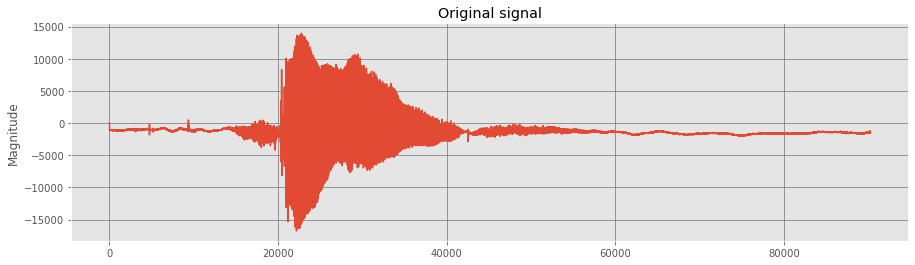

In [83]:
# Reading the signal:

f_rate,signal = wavfile.read("science.wav")

# Plotiing the original signal:

fig = plt.figure(7,figsize=(15,4))
plt.plot(signal)
style.use("ggplot")
plt.grid(color="gray")
plt.ylabel("Magnitude")
plt.title("Original signal")
plt.show()

In [84]:
#Showing output:

print('\nOriginal Audio:')

Audio(signal,rate = f_rate)


Original Audio:


In [85]:
# Adding White the noise to audio:

signal1 = signal/max(signal) # Normalising the signal data

noise1 = np.random.normal(0,0.07,len(signal)) # Creating the noise

noisy_signal1 = signal1 + noise1 # Adding the noise to signal

print('\nAudio with Noise:')

Audio(noisy_signal1,rate = f_rate)


Audio with Noise:


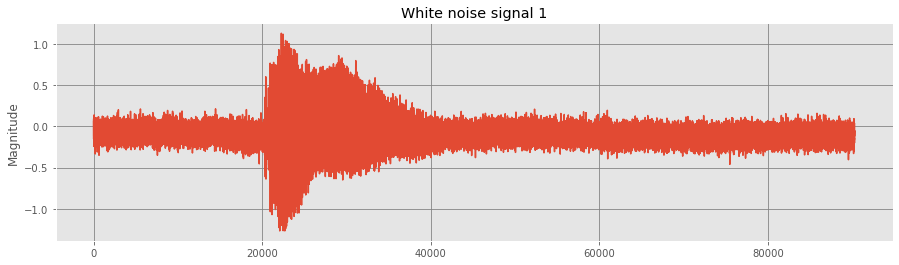

In [86]:
# Plotting the Audio containing the white noise:

fig = plt.figure(7,figsize=(15,4))
plt.plot(noisy_signal1)
style.use("ggplot")
plt.grid(color="gray")
plt.ylabel("Magnitude")
plt.title("White noise signal 1")
plt.show()

In [87]:
#Adding the Poisson noise:

Noise_2 = np.random.poisson(0.001, len(signal)) # Poission Noise:

noisy_signal2 = signal1 + Noise_2

print('\nAudio with Poisson noise:')

Audio(noisy_signal2,rate = f_rate)


Audio with Poisson noise:


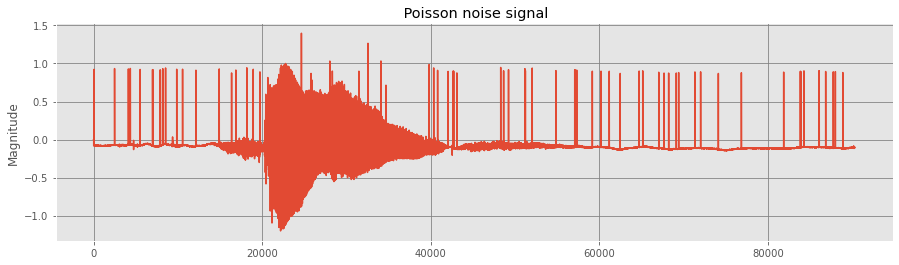

In [88]:
#Plotting the signal containing the poisson noise:

fig = plt.figure(7,figsize=(15,4))
plt.plot(noisy_signal2)
style.use("ggplot")
plt.grid(color="gray")
plt.ylabel("Magnitude")
plt.title(" Poisson noise signal")
plt.show()

In [89]:
# Calculating signal to noise ratio:

def power(x):
    y = 0
    for i in range(len(signal)):
        y = y + x[i]**2
    return(y)

def SNR(x,y):
    snr = 10*math.log(x/y)
    return(snr)

# Audio denoising using threshold:

# For white noise:

In [90]:
fft_signal1 = fft(noisy_signal1) #Finding the fourier transform of signal with noise
fft_noise1  = fft(noise1)    # #Finding the fourier transform of noise

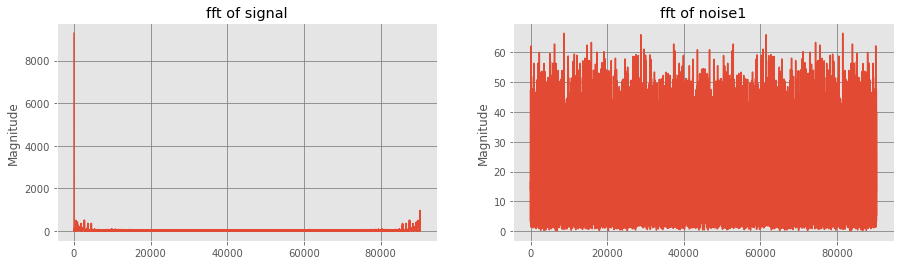

In [91]:
#Plotting the output after the transform:

fig = plt.figure(7,figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(abs(fft_signal1))
style.use("ggplot")
plt.grid(color="gray")
plt.ylabel("Magnitude")
plt.title("fft of signal")
plt.subplot(1,2,2)
plt.plot(abs(fft_noise1))
style.use("ggplot")
plt.grid(color="gray")
plt.ylabel("Magnitude")
plt.title("fft of noise1")
plt.show()

In [92]:
#Applying thresholding:

sig1 = []
for i in range(len(signal1)):
    if(abs(fft_signal1[i])>90):
        sig1.append(fft_signal1[i])
    else:
        sig1.append(0)
        
#taking inverse fourier transform:

denosing1 = ifft(sig1)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


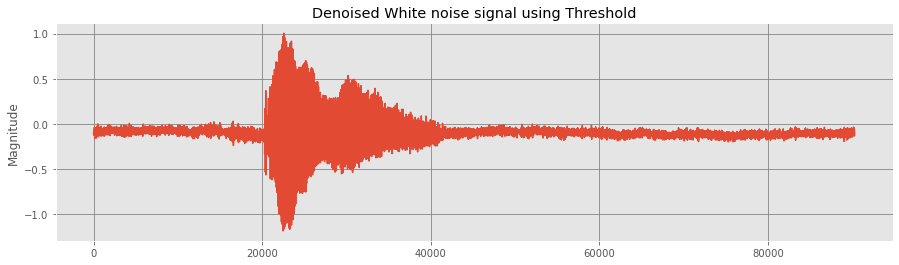

In [93]:
#Plotting the signal after applying thresholding:

fig = plt.figure(7,figsize=(15,4))
plt.plot(denosing1)
style.use("ggplot")
plt.grid(color="gray")
plt.ylabel("Magnitude")
plt.title("Denoised White noise signal using Threshold")
plt.show()

# For poisson noise:

In [94]:
fft_signal1 = fft(noisy_signal2) #Finding the fourier transform of signal with noise
fft_noise1  = fft(Noise_2)    # #Finding the fourier transform of noise

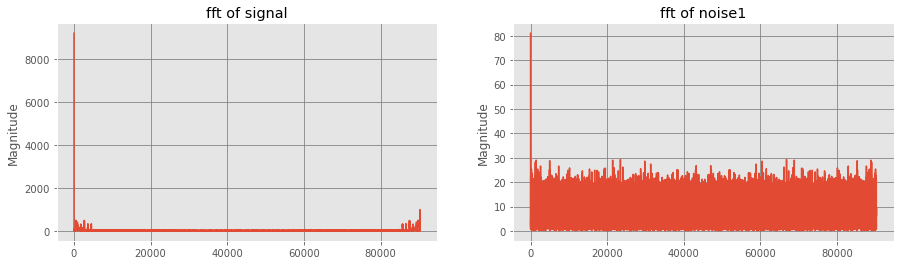

In [95]:
#Plotting the output after the transform:

fig = plt.figure(7,figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(abs(fft_signal1))
style.use("ggplot")
plt.grid(color="gray")
plt.ylabel("Magnitude")
plt.title("fft of signal")
plt.subplot(1,2,2)
plt.plot(abs(fft_noise1))
style.use("ggplot")
plt.grid(color="gray")
plt.ylabel("Magnitude")
plt.title("fft of noise1")
plt.show()

In [96]:
#Applying thresholding:

sig1 = []
for i in range(len(signal1)):
    if(abs(fft_signal1[i])>150):
        sig1.append(fft_signal1[i])
    else:
        sig1.append(0)
        
#taking inverse fourier transform:

denosing1 = ifft(sig1)

In [97]:
#SNR Calculation:

pow_sig = power(denosing1)
pow_noise = power(Noise_2)
Snr = SNR(pow_sig,pow_noise)
print("\n The SNR is:",Snr)


 The SNR is: 31.817571712318646


<ipython-input-89-89f2ccb4ed49>:10: ComplexWarning: Casting complex values to real discards the imaginary part
  snr = 10*math.log(x/y)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


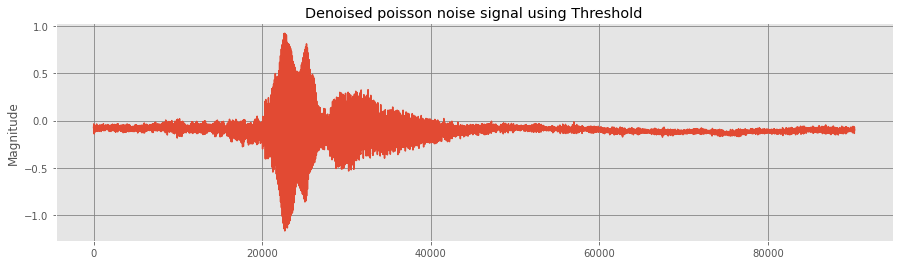

In [98]:
#Plotting the signal after applying thresholding:

fig = plt.figure(7,figsize=(15,4))
plt.plot(denosing1)
style.use("ggplot")
plt.grid(color="gray")
plt.ylabel("Magnitude")
plt.title("Denoised poisson noise signal using Threshold")
plt.show()

# Noise denoising using haar wavelet : 

# Removing white noise:

In [99]:
#Applying Haar transform:

x_denoise = denoise_wavelet(noisy_signal1,method = 'VisuShrink',mode = 'soft',wavelet_levels = 4,wavelet = 'sym8',rescale_sigma ='True')

print('\nAudio after the denosing using Haar wavelet:')
Audio(x_denoise,rate = f_rate)




Audio after the denosing using Haar wavelet:


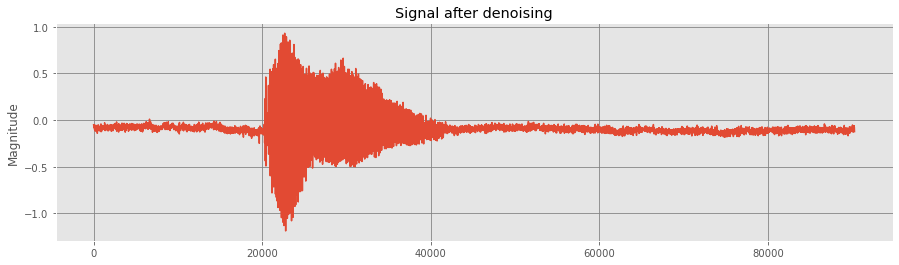

In [100]:
#Showing Output:

fig = plt.figure(7,figsize=(15,4))
plt.plot(x_denoise)
style.use("ggplot")
plt.grid(color="gray")
plt.ylabel("Magnitude")
plt.title("Signal after denoising")
plt.show()

In [101]:
#SNR calculation:

pow_sig = power(x_denoise)
pow_noise = power(noise1)
Snr = SNR(pow_sig,pow_noise)
print("\n The SNR is:",Snr)


 The SNR is: 15.785419088958669


# Removing poisson noise:


In [102]:
#Applying Haar wavelet:

x_denoise1 = denoise_wavelet(noisy_signal2,method = 'VisuShrink',mode = 'soft',wavelet_levels = 4,wavelet = 'sym8',rescale_sigma ='True')

print('\nAudio after the denosing using Haar wavelet:')
Audio(x_denoise,rate = f_rate)


Audio after the denosing using Haar wavelet:


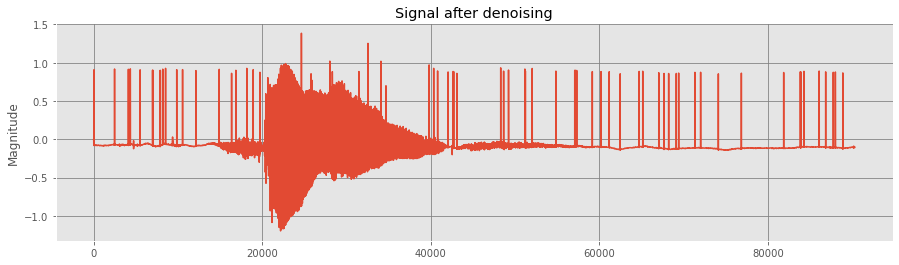

In [103]:
#Showing Output:

fig = plt.figure(7,figsize=(15,4))
plt.plot(x_denoise1)
style.use("ggplot")
plt.grid(color="gray")
plt.ylabel("Magnitude")
plt.title("Signal after denoising")
plt.show()

In [104]:
#SNR Calculation:

pow_sig = power(x_denoise1)
pow_noise = power(Noise_2)
Snr = SNR(pow_sig,pow_noise)
print("\n The SNR is:",Snr)


 The SNR is: 33.892281052010446


# Signal denoising using weiner filter:


# For white noise:

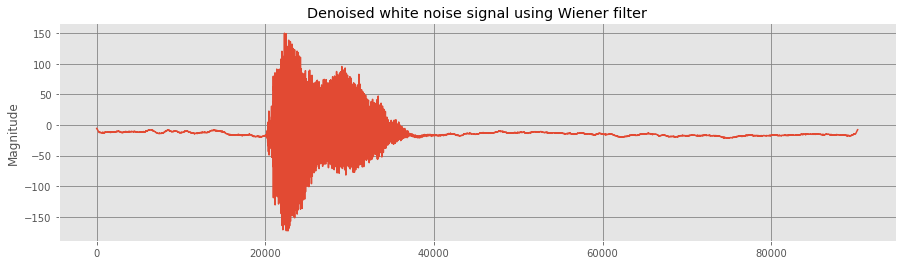

In [105]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as s

#Applying wiener filter:

weinerFilter = s.wiener(150*noisy_signal1,mysize=500)

fig = plt.figure(7,figsize=(15,4))
plt.plot(weinerFilter)
style.use("ggplot")
plt.grid(color="gray")
plt.ylabel("Magnitude")
plt.title("Denoised white noise signal using Wiener filter")
plt.show()
plt.show()

In [106]:
#SNR Calculation:

pow_sig = power(weinerFilter)
pow_noise = power(noise1)
Snr = SNR(pow_sig,pow_noise)
print("\n The SNR is:",Snr)


 The SNR is: 114.30675206267645


# for poisson noise: 

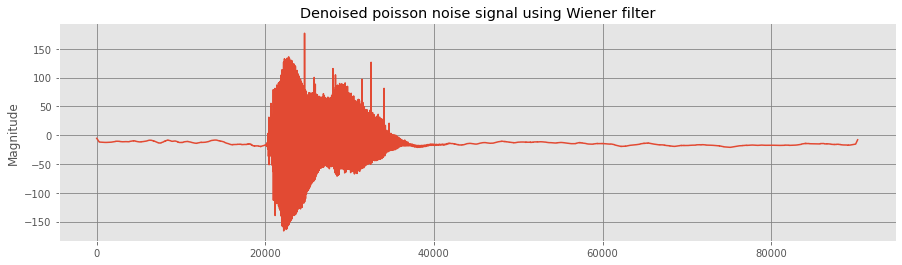

In [107]:
#Applying Wiener filter:

weinerFilter = s.wiener(150*noisy_signal2,mysize=500)

fig = plt.figure(7,figsize=(15,4))
plt.plot(weinerFilter)
style.use("ggplot")
plt.grid(color="gray")
plt.ylabel("Magnitude")
plt.title("Denoised poisson noise signal using Wiener filter")
plt.show()
plt.show()

In [66]:
#SNR Calculation:

pow_sig = power(weinerFilter)
pow_noise = power(Noise_2)
Snr = SNR(pow_sig,pow_noise)
print("\n The SNR is:",Snr)


 The SNR is: 131.89596443996433
